# Modelo de Predicción Diaria del PML

Predecir el precio marginal local (PML) en la zona de Cancún utilizando modelos supervisados a partit de variables historicas como la energia y la congestión,

## 1. Preparación de datos y features

In [2]:
import pandas as pd
from datetime import timedelta
import numpy as np

# Cargar el CSV
df = pd.read_csv('C:\\Cursos\\Data Science\\Proyecto CENANCE\\pml-cancun-forecasting\\data\\PML_CANCUN_FINAL.csv')

# Convertir fecha y zona 
df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True)
df['zona'] = df['zona'].astype("category")

df['hora'] = df['hora'].astype(int)

# Aumentar días según horas inválidas
df['fecha'] += pd.to_timedelta(df['hora'] // 24, unit='d')
df['hora'] = df['hora'] % 24

# Crear columna de fecha y hora combinadas
df['fecha_hora'] = pd.to_datetime(df['fecha'].astype('str') + " " + df['hora'].astype(str) + ":00:00")

# Ordenar por fecha y hora
df = df.sort_values('fecha_hora').reset_index(drop=True)

# Crear variables de tiempo
df['dia_semana'] = df['fecha'].dt.day_of_week # Lunes=0, domingo=6
df['mes'] = df['fecha'].dt.month
df['hora_del_dia'] = df['fecha_hora'].dt.hour
df['es_fin_de_semana'] = df['dia_semana'].isin([5, 6]).astype(int)

# Vista previa
print(df[['fecha_hora', 'precio', 'dia_semana', 'mes', 'hora_del_dia', 'es_fin_de_semana']].head())

           fecha_hora  precio  dia_semana  mes  hora_del_dia  es_fin_de_semana
0 2020-01-01 01:00:00  428.23           2    1             1                 0
1 2020-01-01 02:00:00  396.10           2    1             2                 0
2 2020-01-01 03:00:00  374.27           2    1             3                 0
3 2020-01-01 04:00:00  359.29           2    1             4                 0
4 2020-01-01 05:00:00  327.40           2    1             5                 0


## 2. Entrenamiento y predicción con modelo Prophet

04:32:54 - cmdstanpy - INFO - Chain [1] start processing
04:33:13 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Alex\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


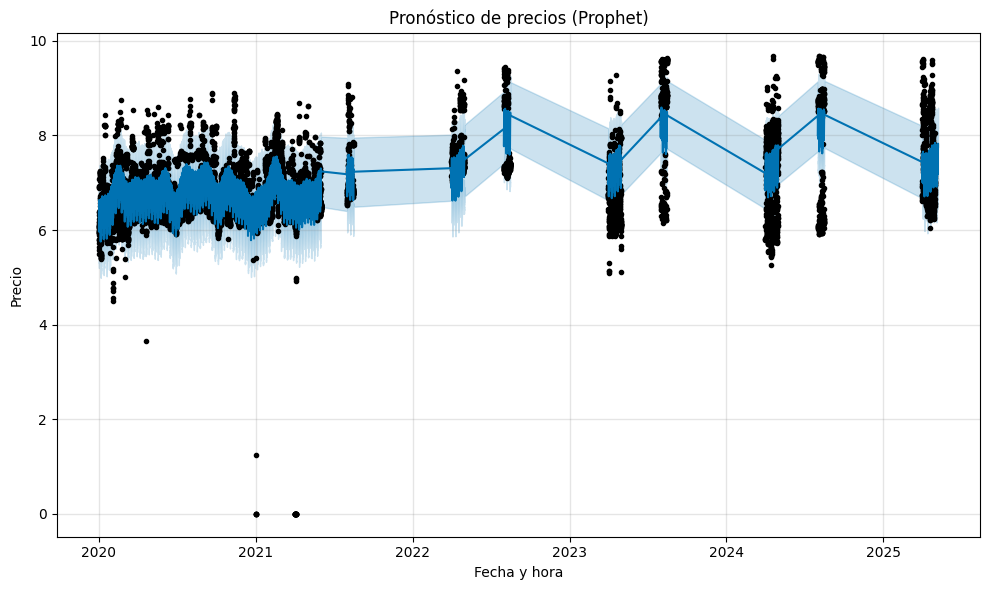

,ds,yhat_real,yhat_lower_real,yhat_upper_real
16845,2025-05-06 01:00:00,1995.758926,992.252794,4059.041552
16846,2025-05-06 02:00:00,1706.137916,791.212664,3485.360911
16847,2025-05-06 03:00:00,1494.743393,719.428986,3243.096960
16848,2025-05-06 04:00:00,1376.760906,664.747470,2902.473347
16849,2025-05-06 05:00:00,1327.860566,661.913075,2686.910750
16850,2025-05-06 06:00:00,1316.491894,645.487144,2801.700265
16851,2025-05-06 07:00:00,1323.865879,631.584942,2788.715437
16852,2025-05-06 08:00:00,1348.337472,671.890053,2954.903774
16853,2025-05-06 09:00:00,1394.061607,668.608082,3018.017497
16854,2025-05-06 10:00:00,1456.469682,693.541265,2954.469768


In [3]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preparar datos
df_log = df.copy()
df_log['y'] = np.log1p(df_log['precio'])
df_log['ds'] = df_log['fecha_hora']
df_prophet_log = df_log[['ds', 'y']]

# Entrenar modelo Prophet
modelo_log = Prophet()
modelo_log.fit(df_prophet_log)

# Definir horizonte de predicción
dias_a_predecir = 7
horizonte = dias_a_predecir * 24  # 7 días x 24 horas

# Crear futuro y predecir
futuro = modelo_log.make_future_dataframe(periods=horizonte, freq='H')
pronostico_log = modelo_log.predict(futuro)

# Invertir logaritmo (¡después de predecir!)
pronostico_log['yhat_real'] = np.expm1(pronostico_log['yhat'])
pronostico_log['yhat_lower_real'] = np.expm1(pronostico_log['yhat_lower'])
pronostico_log['yhat_upper_real'] = np.expm1(pronostico_log['yhat_upper'])

# Visualizar
modelo_log.plot(pronostico_log)
plt.title("Pronóstico de precios (Prophet)")
plt.xlabel("Fecha y hora")
plt.ylabel("Precio")
plt.tight_layout()
plt.show()

# Ver últimas 48 horas
pronostico_log[['ds', 'yhat_real', 'yhat_lower_real', 'yhat_upper_real']].tail(48)


## 3. Evaluación del modelo

Comparar las predicciones con los valores reales y calcular metricas como: ***MAE,*** ***RMSE,*** y ***MAPE***
### ***¿Que significan estas métricas?***

1. **MAE (Mean Absolute Error)**
    - 🔍 Mide el promedio de los errores absolutos entre los reales y predichos.
    - Es Fácil de interpretar: cuánto te estás equivocando en promedio.
    - 💬 Ejemplo: "En promedio, el modelo se equivoca en X pesos"

2. **RMSE (Root Mean Squared Error)**
    - 🔍 Mide el promedio del cuadrado de los errores, pero luego saca la raíz cuadrada.
    - Penaliza más los errores grandes.
    - 💬 Es util si quieres ser muy estricto con los picos o predicciones malas,

3. **MAPE (Mean Absolute Percentage Error)**
    - 🔍 Mide el error porcentual medio.
    - Es una métrica relativa: te dice el error en porceentaje respecto al valor real.
    - 💬 Ejemplo: "El modelo se equivoca en promedio un 12%"

In [4]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preparar datos
df_log = df.copy()
df_log['y'] = np.log1p(df_log['precio'])
df_log['ds'] = df_log['fecha_hora']
df_prophet_log = df_log[['ds', 'y']]

# Entrenar modelo
modelo_log = Prophet()
modelo_log.fit(df_prophet_log)

# Crear futuro y predecir
dias_a_predecir = 7
horizonte = dias_a_predecir * 24
futuro = modelo_log.make_future_dataframe(periods=horizonte, freq='H')
pronostico_log = modelo_log.predict(futuro)

# Invertir transformación logarítmica
pronostico_log['yhat_real'] = np.expm1(pronostico_log['yhat'])

# Comparar con datos reales
df_pred = pronostico_log[['ds', 'yhat_real']].rename(columns={'ds': 'fecha_hora', 'yhat_real': 'precio_predicho'})
df_real = df[['fecha_hora', 'precio']]
df_comparacion = df_real.merge(df_pred, on='fecha_hora', how='inner')

# Calcular métricas
mae = mean_absolute_error(df_comparacion['precio'], df_comparacion['precio_predicho'])
rmse = np.sqrt(mean_squared_error(df_comparacion['precio'], df_comparacion['precio_predicho']))
mape = np.mean(np.abs((df_comparacion['precio'] - df_comparacion['precio_predicho']) / df_comparacion['precio'])) * 100

# Mostrar resultados
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


04:33:28 - cmdstanpy - INFO - Chain [1] start processing
04:33:48 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Alex\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


MAE: 643.68
RMSE: 1591.80
MAPE: inf%


## 4. Visualización de resultados
🎯 Objetivo:

Comparar visualmente los ***valores reales*** y los ***valores predichos*** para analizar el desempeño del modelo

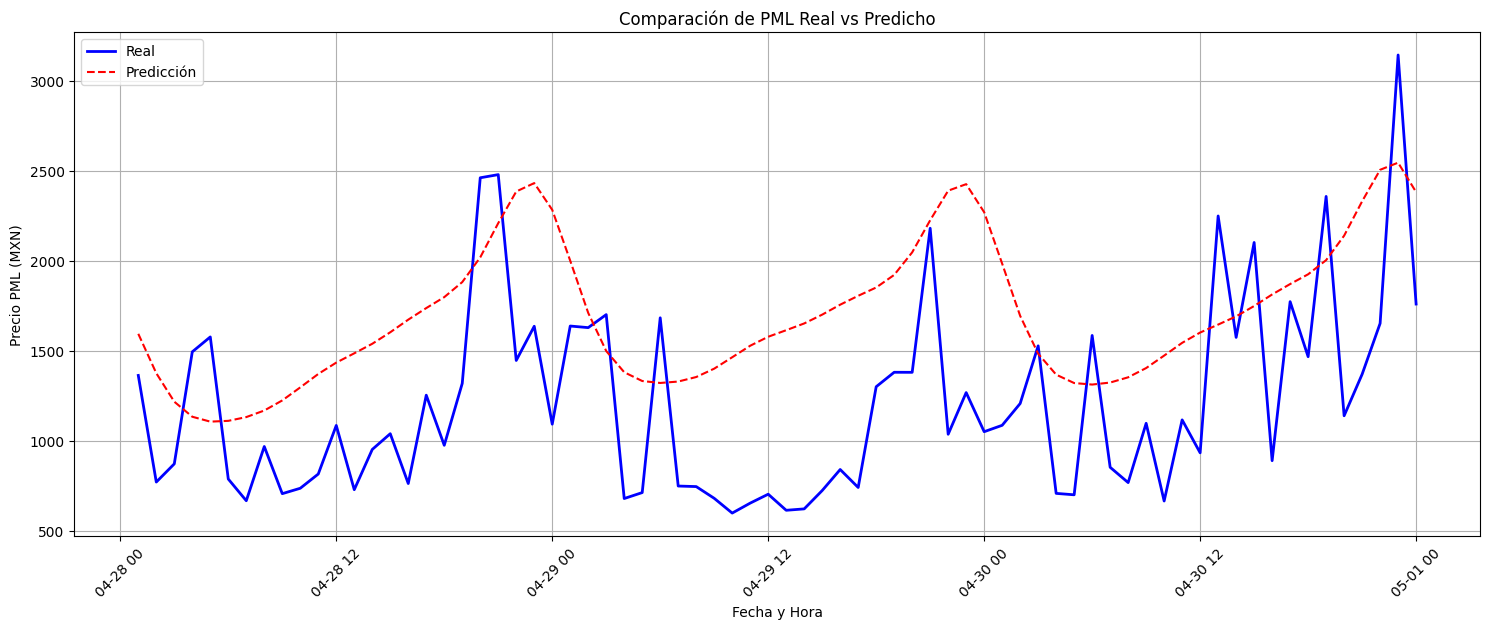

In [5]:
import matplotlib.pyplot as plt

# Crear DataFrame comparativo con valores reales y predichos
df_comparacion = df[['fecha_hora', 'precio']].merge(
    pronostico_log[['ds', 'yhat_real']],
    left_on='fecha_hora',
    right_on='ds',
    how='inner'
).rename(columns={'yhat_real': 'precio_predicho'})

# Seleccionar un rango tiempo reciente para visualizar
rango = 72
df_plot = df_comparacion.tail(rango)
    
# Crear gráfica
plt.figure(figsize=(15, 6))
plt.plot(df_plot['fecha_hora'], df_plot['precio'], label='Real', color='blue', linewidth=2)
plt.plot(df_plot['fecha_hora'], df_plot['precio_predicho'], label='Predicción', color='red', linestyle='--')
plt.xlabel('Fecha y Hora')
plt.ylabel('Precio PML (MXN)')
plt.title('Comparación de PML Real vs Predicho')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## 5. Exportar predicciones para Power BI

In [6]:
##import os

# Redondeamos las métricas para mayor claridad
mae = round(mae, 2)
rmse = round(rmse, 2)
mape = round(mape, 2)

# Creamos una copia del DataFrame comparativo
df_export = df_comparacion.copy()

# Insertamos filas con métricas al final
metricas_df = pd.DataFrame({
    'fecha_hora': ['MÉTRICAS', '', ''],
    'precio': ['MAE', 'RMSE', 'MAPE'],
    'precio_predicho': [mae, rmse, mape]
})

# Unimos ambos DataFrames
df_export = pd.concat([df_export, metricas_df], ignore_index=True)

# Exportamos a CSV

ruta_exportacion_metricas = 'C:/Cursos/Data Science/Proyecto CENANCE/pml-cancun-forecasting/data/proyeccion_con_metricas.csv'

# Exportar a CSV
df_export.to_csv(ruta_exportacion_metricas, index=False)

print(f"✅📤 Archivo 'Prediciones_con_metricas.csv' creado con éxito en: 📁 {ruta_exportacion_metricas}")

✅📤 Archivo 'Prediciones_con_metricas.csv' creado con éxito en: 📁 C:/Cursos/Data Science/Proyecto CENANCE/pml-cancun-forecasting/data/proyeccion_con_metricas.csv
